# importing libraries


In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.10.0+cu111 True


In [2]:
from google.colab import drive
drive.mount('/content/drive')  

Mounted at /content/drive


In [3]:
!python -m pip install 'git+https://github.com/zhaoweicai/Detectron-Cascade-RCNN' 

  Cloning https://github.com/zhaoweicai/Detectron-Cascade-RCNN to /tmp/pip-req-build-1ed227ap
  Running command git clone -q https://github.com/zhaoweicai/Detectron-Cascade-RCNN /tmp/pip-req-build-1ed227ap
  Created wheel for Detectron: filename=Detectron-0.0.0-cp37-cp37m-linux_x86_64.whl size=200524 sha256=041490b03231b4189935494cc5af98ee10b6e0db53f166409974efe68d8330fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-8piajq7w/wheels/dd/26/09/67236a9442b327a8acbda8d95f783bc0314f191fcec1040e39
Successfully built Detectron


In [4]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git' 

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-d4k52j_x
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-d4k52j_x
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
     |████████████████████████████████| 145 kB 13.0 MB/s 
     |████████████████████████████████| 130 kB 36.8 MB/s 
     |████████████████████████████████| 843 kB 52.4 MB/s 
     |████████████████████████████████| 749 kB 68.0 MB/s 
     |████████████████████████████████| 596 kB 58.9 MB/s 
     |████████████████████████████████| 112 kB 79.1 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5720414 sha256=18a70f837054ac06632434166ea3503d6ae23480b0daaa66557e5a4cdc7c5e17
  Stored in directory: /tmp/pip-ephem-wheel-cache-jr9mmd6h/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7d149d69c27ca5d
  Created wheel for fvcore: filename=fvcore

In [5]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 8.9 MB/s 
     |████████████████████████████████| 948 kB 39.9 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=70580c9c483bf310e2a47fd45384589d11390c72539fa1537d291e6dba2556ae
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
import pandas as pd
import numpy as np
import pandas as pd 
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm # progress bar
from datetime import datetime
import time
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import os, json, cv2, random
import skimage.io as io
import copy
from pathlib import Path
from typing import Optional



from tqdm import tqdm
import itertools

# import torch
import albumentations as A
# from albumentations.pytorch.transforms import ToTensorV2

from glob import glob
import numba
from numba import jit

import warnings
warnings.filterwarnings('ignore') #Ignore "future" warnings and Data-Frame-Slicing warnings.


# detectron2
from detectron2.structures import BoxMode
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor, DefaultTrainer, launch
from detectron2.evaluation import COCOEvaluator
from detectron2.structures import BoxMode
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.logger import setup_logger
from detectron2.utils.visualizer import Visualizer

from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils


from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

setup_logger()

<Logger detectron2 (DEBUG)>

# Loading Dataset

In [10]:
Data_Resister_training="sartorius_Cell_train";
Data_Resister_valid="sartorius_Cell_valid";
from detectron2.data.datasets import register_coco_instances
dataDir=Path("/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Data")

DatasetCatalog.clear()
MetadataCatalog.clear()

# register_coco_instances(Data_Resister_training,{}, '/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/1Fold (cleaned)/coco_cell_train_fold1-clean.json', dataDir)
# register_coco_instances(Data_Resister_valid,{},'../input/crossvalidationfold05/coco_cell_valid_fold5.json', dataDir)
 
# register_coco_instances(Data_Resister_training,{}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/5Fold-cleaned/coco_cell_train_fold5-cleaned.json", dataDir)
# register_coco_instances(Data_Resister_valid,{}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/5Fold/coco_cell_valid_fold5.json", dataDir)

# register_coco_instances(Data_Resister_training,{}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/allFolds (cleaned)/annotations_train_fold0.json", dataDir)
# register_coco_instances(Data_Resister_valid,{}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/allFolds (original)/annotations_val_fold4.json", dataDir)


register_coco_instances(Data_Resister_training, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_train_fold1.json", dataDir)
register_coco_instances(Data_Resister_valid, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_valid_fold1.json", dataDir)


# register_coco_instances(Data_Resister_training, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/BEST/annotations_train.json", dataDir)
# register_coco_instances(Data_Resister_valid, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/BEST/annotations_val.json", dataDir)

metadata = MetadataCatalog.get(Data_Resister_training)
dataset_train = DatasetCatalog.get(Data_Resister_training)
dataset_valid = DatasetCatalog.get(Data_Resister_valid)

[12/26 20:37:33 d2.data.datasets.coco]: Loading /content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_train_fold1.json takes 3.52 seconds.
[12/26 20:37:33 d2.data.datasets.coco]: Loaded 484 images in COCO format from /content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_train_fold1.json
[12/26 20:37:36 d2.data.datasets.coco]: Loading /content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_valid_fold1.json takes 1.17 seconds.
[12/26 20:37:36 d2.data.datasets.coco]: Loaded 122 images in COCO format from /content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_valid_fold1.json


# **Creating Dataset**

# Data Visualization
* It's also very easy to visualize prepared training dataset with detectron2.
* It provides Visualizer class, we can use it to draw an image with mask and bounding box as following.

(520, 704, 3)


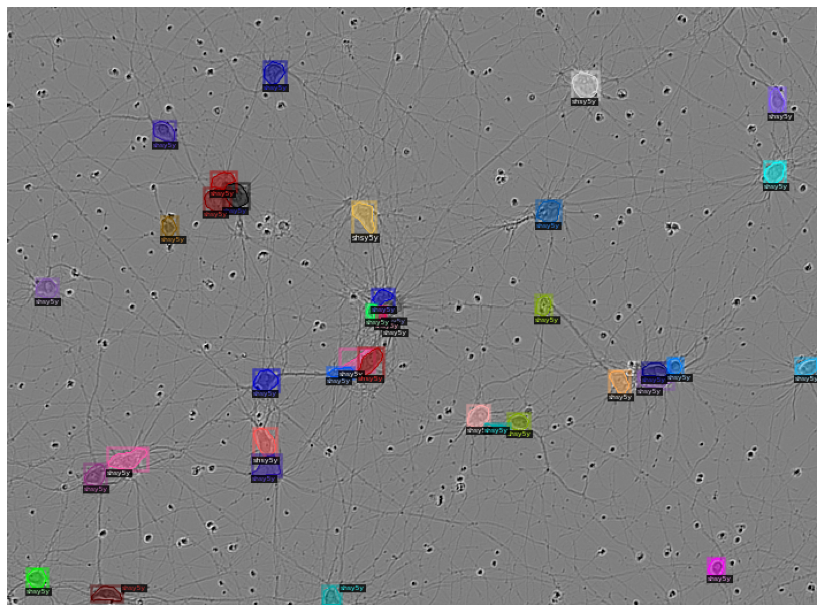

In [11]:
fig, ax = plt.subplots(figsize=(18,11))
d=dataset_valid[5] 
img = cv2.imread(d["file_name"])
print(img.shape)
v = Visualizer(img[:, :, ::-1],
                metadata=metadata, 
                scale=1,
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
out = v.draw_dataset_dict(d)
ax.grid(False)
ax.axis('off')
ax.imshow(out.get_image()[:, :, ::-1])

# Data Augmentation
The dataset is transformed by changing the brighness and flipping the image with 50% probability...etc

In [12]:
class CopyPasteAugmentator:
    """Copy-paste cells from another image in the dataset
    """
    def __init__(self, d2_dataset,
                 paste_same_class=True,
                 paste_density=[0.3, 0.6],
                 filter_area_thresh=0.1,
                 p=0.5):
        self.data = d2_dataset
        self.n_samples = len(d2_dataset)
        self.paste_same_class = paste_same_class
        if paste_same_class:
            self.cls_indices = [
                [
                    i for i, item in enumerate(d2_dataset)
                    if item['annotations'][0]['category_id'] == cls_index
                ]
                for cls_index in range(3)
            ]
        self.filter_area_thresh = filter_area_thresh
        self.paste_density = paste_density
        self.p = p
  
    def __call__(self, dataset_dict):
        # print(dataset_dict)
        orig_img = cv2.imread(dataset_dict["file_name"])
        if 'LIVECell_dataset_2021' in dataset_dict["file_name"]:
            return orig_img, dataset_dict

        if np.random.uniform() < self.p:

            # Choose a sample to copy-paste from
            if self.paste_same_class:
                cls_id = dataset_dict['annotations'][0]['category_id']
                random_idx = np.random.randint(0, len(self.cls_indices[cls_id]))
                random_ds_dict = self.data[self.cls_indices[cls_id][random_idx]]
            else:
                random_idx = np.random.randint(0, self.n_samples)
                random_ds_dict = self.data[random_idx]

            # Load chosen sample
#             random_img = cv2.imread(random_ds_dict['file_name'])
            random_img = utils.read_image(random_ds_dict["file_name"], format="BGR")
            if isinstance(self.paste_density, list):
                paste_density = np.random.uniform(self.paste_density[0], self.paste_density[1])
            else:
                paste_density = self.paste_density
      
            # Selection indices
            selected_cell_ids = np.random.choice(
                len(random_ds_dict['annotations']),
                size=round(paste_density * len(random_ds_dict['annotations'])),
                replace=False)

            # Select annotations (we deepcopy only selected ones, not the whole dict)
            selected_annos = [copy.deepcopy(random_ds_dict['annotations'][i])
                            for i in selected_cell_ids]
            copypaste_mask = mask_util.decode(selected_annos[0]['segmentation']).astype(np.bool)
            for anno in selected_annos[1:]:
                copypaste_mask |= mask_util.decode(anno['segmentation']).astype(np.bool)
      
            # Copy cells over
            neg_mask = ~copypaste_mask
            filtered_annos = []
            for anno in dataset_dict['annotations']:
                mask = mask_util.decode(anno['segmentation']).astype(np.bool)
                ocluded_mask = (mask & neg_mask)
                if (round(self.filter_area_thresh * mask.sum()) < ocluded_mask.sum()):
                    anno['segmentation'] = mask_util.encode(np.asfortranarray(ocluded_mask))
                    filtered_annos.append(anno)

            # Form output
            orig_img[copypaste_mask] = random_img[copypaste_mask]
            dataset_dict['annotations'] = filtered_annos + selected_annos

        return orig_img, dataset_dict

In [24]:
def custom_mapper(dataset_dict):
    dataset_dict = copy.deepcopy(dataset_dict)
    image = utils.read_image(dataset_dict["file_name"], format="BGR")

    copypaste_augmentator = CopyPasteAugmentator(
                            dataset_train,
                            paste_same_class=True,
                            paste_density=[0.2, 0.6],
                            filter_area_thresh=0.1,
                            p=1.,
                        )
    
    transform_list = [
            # T.Resize(shape=(800, 800)),
            # T.RandomCrop("relative", (.8, .8)),
            T.RandomFlip(prob=0.6, horizontal=False, vertical=True),
            T.RandomFlip(prob=0.6, horizontal=True, vertical=False),
            T.ResizeShortestEdge(short_edge_length=(480, 520, 560, 640, 672, 704, 736, 768, 800), max_size=800, sample_style='choice', ),
            # ratations 
    ]


    # image, dataset_dict = copypaste_augmentator(dataset_dict)   
    image, transforms = T.apply_transform_gens(transform_list, image)

    
    dataset_dict["image"] = torch.as_tensor(image.transpose(2, 0, 1).astype("float32"))

    annos = [
        utils.transform_instance_annotations(obj, transforms, image.shape[:2])
        for obj in dataset_dict.pop("annotations")
        if obj.get("iscrowd", 0) == 0
    ]
    
    image_shape = image.shape[:2]
    dataset_dict['image'] = torch.as_tensor(image.transpose(2, 0, 1).astype(np.float32))
    dataset_dict['instances'] = utils.filter_empty_instances(
        utils.annotations_to_instances(annos, image_shape, mask_format="bitmask")
    )
    
    return dataset_dict


class AugTrainer(DefaultTrainer):
    @classmethod
    def build_train_loader(cls, cfg, sampler=None):
        return build_detection_train_loader(cfg, mapper=custom_mapper)

    
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        return InstanceSegmentationEvaluator(dataset_name)

# Evaluator

In [26]:
# Taken from https://www.kaggle.com/theoviel/competition-metric-map-iou
from detectron2.evaluation.evaluator import DatasetEvaluator
import pycocotools.mask as mask_util
from detectron2.data import DatasetMapper
from detectron2.modeling import build_model, GeneralizedRCNNWithTTA

def precision_at(threshold, iou):
    matches = iou > threshold
    true_positives = np.sum(matches, axis=1) == 1  # Correct objects
    false_positives = np.sum(matches, axis=0) == 0  # Missed objects
    false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
    return np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)

def score(pred, targ):
    pred_masks = pred['instances'].pred_masks.cpu().numpy()
    enc_preds = [mask_util.encode(np.asarray(p, order='F')) for p in pred_masks]
    enc_targs = list(map(lambda x:x['segmentation'], targ))
    ious = mask_util.iou(enc_preds, enc_targs, [0]*len(enc_targs))
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, ious)
        p = tp / (tp + fp + fn)
        prec.append(p)
        
    return np.mean(prec)


class MAPIOUEvaluator(DatasetEvaluator):
    def __init__(self, dataset_name):
        dataset_dicts = DatasetCatalog.get(dataset_name)
        self.annotations_cache = {item['image_id']:item['annotations'] for item in dataset_dicts}
            
    def reset(self):
        self.scores = []

    def process(self, inputs, outputs):
        for inp, out in zip(inputs, outputs):
            if len(out['instances']) == 0:
                self.scores.append(0)    
            else:
                targ = self.annotations_cache[inp['image_id']]
                self.scores.append(score(out, targ))

    def evaluate(self):
        return {"MaP IoU": np.mean(self.scores)}


class InstanceSegmentationEvaluator(DatasetEvaluator):
    def __init__(self, dataset_name, segmentation_format='bitmask'):

        dataset = DatasetCatalog.get(dataset_name)
        self.annotations_cache = {item['image_id']: item['annotations'] for item in dataset}
        self.segmentation_format = segmentation_format

    def reset(self):

        self.scores = []
        self.labels = []

    def process(self, inputs, outputs):

        for input_, output in zip(inputs, outputs):
            if len(output['instances']) == 0:
                # Set 0 mAP when there are no objects predicted by model
                self.scores.append(0)
                annotation = self.annotations_cache[input_['image_id']]
                label = np.unique(list(map(lambda x: x['category_id'], annotation)))[0]
                self.labels.append(label)
            else:
                # Calculate mAP with predicted objects
                annotation = self.annotations_cache[input_['image_id']]
                prediction_masks = output['instances'].pred_masks.cpu().numpy()
                average_precision = score(output, annotation)
                self.scores.append(average_precision)
                label = np.unique(list(map(lambda x: x['category_id'], annotation)))[0]
                self.labels.append(label)

    def evaluate(self):

        df_scores = pd.DataFrame(columns=['scores', 'labels'])
        df_scores['scores'] = np.array(self.scores)
        df_scores['labels'] = np.array(self.labels)
        df_scores = df_scores.groupby('labels')['scores'].mean().to_dict()

        return {'mAP': np.mean(self.scores), 'mAP cort': df_scores[0], 'mAP shsy5y': df_scores[1], 'mAP astro': df_scores[2]}

    
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        return InstanceSegmentationEvaluator(dataset_name)

    
    @classmethod
    def test_with_TTA(cls, cfg, model):
        logger = logging.getLogger("detectron2.trainer")
        # In the end of training, run an evaluation with TTA
        # Only support some R-CNN models.
        logger.info("Running inference with test-time augmentation ...")
        model = GeneralizedRCNNWithTTA(cfg, model)
        evaluators = [
            cls.build_evaluator(
                cfg, name, output_folder=os.path.join(
                    cfg.OUTPUT_DIR, "inference_TTA")
            )
            for name in cfg.DATASETS.TEST
        ]
        res = cls.test(cfg, model, evaluators)
        res = OrderedDict({k + "_TTA": v for k, v in res.items()})
        return res

# Training

In [ ]:
from detectron2.config.config import CfgNode as CN

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Checkpoints - Models/Resnet50"

# config_name = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
# config_name = "Misc/cascade_mask_rcnn_X_152_32x8d_FPN_IN5k_gn_dconv.yaml" 
config_name = "Misc/cascade_mask_rcnn_R_50_FPN_3x.yaml"

cfg.merge_from_file(model_zoo.get_config_file(config_name))
cfg.DATASETS.TRAIN = (Data_Resister_training,)
cfg.DATASETS.TEST = (Data_Resister_valid,)

# cfg.aug_kwargs = CN(flags.aug_kwargs)  # pass aug_kwargs to cfg
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_name)

# Resnet 50
# cfg.MODEL.WEIGHTS = "../input/detectron2cellinstancesegmentation/model_0001999.pth"
# cfg.MODEL.WEIGHTS = "../input/detectron2cellinstancesegmentation/model_0001999--2.77inference_loss.pth"
# cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Checkpoints - Models/Resnet50/model_0008953.pth"
# cfg.MODEL.WEIGHTS = "/content/output/model_0002177.pth"
# cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Detectron2/models/model_0011999-aug-0.290.pth"
# cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-models/fold1-cv0277.pth"

# Cascade Resnet50
# cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Detectron2/models/model_0003899-0.2759.pth"


# Resnet 101
# cfg.MODEL.WEIGHTS ="../input/detectron2cellinstancesegmentation/model_0003499-x101-0.2625iou.pth"
# cfg.MODEL.WEIGHTS ="/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Detectron2/models/model_0004799-0.281.pth"
# cfg.MODEL.WEIGHTS ="/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Detectron2/models/model_0005699-2.777.pth"


# Cascade RCNN
# cfg.MODEL.WEIGHTS ="../input/sartoriouscascade-maskrcnnx-152-32x8d/model_0002099-cascade-x152-0.2665iou.pth"
# cfg.MODEL.WEIGHTS ="../input/sartoriouscascade-maskrcnnx-152-32x8d/model_0001799-cascade-x152-0.2721iou.pth"
# cfg.MODEL.WEIGHTS ="../input/sartoriouscascade-maskrcnnx-152-32x8d/model_0002249-cascade-x152-0.2801.pth" # (+)
# cfg.MODEL.WEIGHTS ="../input/sartoriouscascade-maskrcnnx-152-32x8d/model_0003499-aug-cascade-x152-0.29.pth"
# cfg.MODEL.WEIGHTS ="../input/sartoriouscascade-maskrcnnx-152-32x8d/model_0002749-cascade-x152-0.2101.pth"     # 0.2801

# Aug + Cascade RCNN
# cfg.MODEL.WEIGHTS ="../input/sartoriouscascade-maskrcnnx-152-32x8d/model_0005999-aug-0.2521.pth" # (+)
# cfg.MODEL.WEIGHTS ="../input/sartoriouscascade-maskrcnnx-152-32x8d/model_0003599-cascade-x152-aug-0.28325.pth" # (+)
# cfg.MODEL.WEIGHTS="./output/model_0003299.pth"



cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 
cfg.SOLVER.IMS_PER_BATCH = 2 
cfg.INPUT.MASK_FORMAT='bitmask'
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5


# cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupMultiStepLR"
cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupCosineLR"
cfg.SOLVER.BASE_LR = 0.0005


# Extra configs to get better predictions
# cfg.MODEL.ANCHOR_GENERATOR.SIZES = [[16,16], [32,32], [64,64], [128,128], [256,256], [512,512],]
# cfg.MODEL.RPN.IN_FEATURES = ['p2', 'p3', 'p4', 'p5', 'p6', 'p6',]
# cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.33, 0.5, 1.0, 2.0, 3.0]]


    
cfg.SOLVER.WARMUP_ITERS = 400 #How many iterations to go from 0 to reach base LR
cfg.SOLVER.MAX_ITER = 60000 #Maximum of iterations 1
# cfg.SOLVER.STEPS = (5000, 8000) #At which point to change the LR 0.25,0.5
cfg.TEST.EVAL_PERIOD = len(DatasetCatalog.get('sartorius_Cell_train')) // cfg.SOLVER.IMS_PER_BATCH
cfg.SOLVER.CHECKPOINT_PERIOD = cfg.TEST.EVAL_PERIOD


cfg.MODEL.RPN.BBOX_REG_LOSS_TYPE = "ciou"
cfg.MODEL.ROI_BOX_HEAD.BBOX_REG_LOSS_TYPE = "ciou"
cfg.MODEL.LOSS_TYPE = "diou"
# cfg.MODEL.LOSS_TYPE = "dciou"


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True) 
trainer = Trainer(cfg)  # without data augmentation
# trainer = AugTrainer(cfg)  # with  data augmentation  
trainer.resume_or_load(resume=False)
trainer.train()

[12/27 16:42:31 d2.data.datasets.coco]: Loading /content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_train_fold1.json takes 1.51 seconds.
[12/27 16:42:31 d2.data.datasets.coco]: Loaded 484 images in COCO format from /content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_train_fold1.json
[12/27 16:42:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, k

model_final_480dd8.pkl: 288MB [00:04, 68.9MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.0.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.0.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.1.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.1.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.2.cls_score.weight' to the mo

[12/27 16:42:40 d2.engine.train_loop]: Starting training from iteration 0
[12/27 16:43:13 d2.utils.events]:  eta: 11:03:33  iter: 19  total_loss: 8.37  loss_cls_stage0: 1.301  loss_box_reg_stage0: 0.0568  loss_cls_stage1: 1.357  loss_box_reg_stage1: 0.04444  loss_cls_stage2: 1.421  loss_box_reg_stage2: 0.02541  loss_mask: 0.6935  loss_rpn_cls: 3.166  loss_rpn_loc: 0.2198  time: 1.6886  data_time: 1.1204  lr: 2.4224e-05  max_mem: 7722M
[12/27 16:43:38 d2.utils.events]:  eta: 10:51:31  iter: 39  total_loss: 5.009  loss_cls_stage0: 1.2  loss_box_reg_stage0: 0.06037  loss_cls_stage1: 1.155  loss_box_reg_stage1: 0.04423  loss_cls_stage2: 1.17  loss_box_reg_stage2: 0.02864  loss_mask: 0.6885  loss_rpn_cls: 0.3606  loss_rpn_loc: 0.2114  time: 1.4545  data_time: 0.7277  lr: 4.9196e-05  max_mem: 7722M
[12/27 16:44:04 d2.utils.events]:  eta: 10:44:28  iter: 59  total_loss: 3.671  loss_cls_stage0: 0.857  loss_box_reg_stage0: 0.06504  loss_cls_stage1: 0.8088  loss_box_reg_stage1: 0.04847  loss_cls

# Evaluator
* Famouns dataset's evaluator is already implemented in detectron2.
* For example, many kinds of AP (Average Precision) are calculted in COCOEvaluator.
* **COCOEvaluator calculates AP with IoU from 0.50 to 0.95**

In [ ]:
evaluator = COCOEvaluator(Data_Resister_valid, cfg, False, output_dir="./output/")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Checkpoints - Models/Resnet50/model_0038235.pth"

## **Testing the model on astro only**

In [ ]:
Data_Resister_test = "sartorius_Cell_test";
# register_coco_instances(Data_Resister_test, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_valid_fold2.json", dataDir)
# 
test_loader = build_detection_test_loader(cfg, Data_Resister_test)
inference_on_dataset(trainer.model, test_loader, evaluator)

## **Testing the model on cort only**

In [ ]:
Data_Resister_test = "sartorius_Cell_valid";
register_coco_instances(Data_Resister_valid, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_valid_fold2.json", dataDir)

val_loader = build_detection_test_loader(cfg, Data_Resister_valid)
inference_on_dataset(trainer.model, val_loader, evaluator)

## **Testing the model on shs5y only**

In [ ]:
Data_Resister_test = "sartorius_Cell_valid";
register_coco_instances(Data_Resister_valid, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_valid_fold3.json", dataDir)

val_loader = build_detection_test_loader(cfg, Data_Resister_valid)
inference_on_dataset(trainer.model, val_loader, evaluator)

## **Testing the model on validation with mixed cells**

In [ ]:
Data_Resister_test = "sartorius_Cell_valid";
register_coco_instances(Data_Resister_valid, {}, "/content/drive/MyDrive/ML_Lab/Kaggle/Cell-Instance-Segmentation/Coco-Dataset/(shared) Sartorius - Cell Instance Segmentation/shared-coco-datasets/coco_cell_valid_fold4.json", dataDir)

val_loader = build_detection_test_loader(cfg, Data_Resister_valid)
inference_on_dataset(trainer.model, val_loader, evaluator)

# **Getting metrics**

In [ ]:
import pandas as pd
metrics_df = pd.read_json("./output/metrics.json", orient="records", lines=True)
mdf = metrics_df.sort_values("iteration")


# Loss curve

In [ ]:
# 1. Loss curve
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["total_loss"].isna()]
ax.plot(mdf1["iteration"], mdf1["total_loss"], c="C0", label="train")
if "validation_loss" in mdf.columns:
    mdf2 = mdf[~mdf["validation_loss"].isna()]
    ax.plot(mdf2["iteration"], mdf2["validation_loss"], c="C1", label="validation")

# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Loss curve")
plt.show()

# Accuracy curve

In [ ]:
# 1. Accuracy curve
fig, ax = plt.subplots()

mdf1 = mdf[~mdf["fast_rcnn/cls_accuracy"].isna()]
ax.plot(mdf1["iteration"], mdf1["fast_rcnn/cls_accuracy"], c="C0", label="train")
# ax.set_ylim([0, 0.5])
ax.legend()
ax.set_title("Accuracy curve")
plt.show()

# Predictor

In [ ]:
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, 
#                                  "../input/detectron2cellinstancesegmentation/model_0001999.pth",
#                                  "./output/model_0003499.pth"
#                                 )
# cfg.MODEL.WEIGHTS = "../input/detectron2cellinstancesegmentation/model_0003749.pth"
#cfg.MODEL.WEIGHTS = "./output/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold for this model
cfg.DATASETS.TEST = (Data_Resister_valid, )
predictor = DefaultPredictor(cfg)

In [ ]:
fig, ax = plt.subplots(4, 1, figsize =(20,50))
indices=[ax[0],ax[1],ax[2],ax[3] ]
i=-1
for d in random.sample(dataset_valid, 8):
    i=i+1    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata, 
                   scale=1, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])